In [2]:
# Import libraries for data analysis and manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Import libraries for model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
# Import Data Set

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
# Check missing values
print('Column with missing value:')
print(penguins.isna().sum())
print('Total missing value in dataframe:', penguins.isna().sum().sum())

Column with missing value:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Total missing value in dataframe: 19


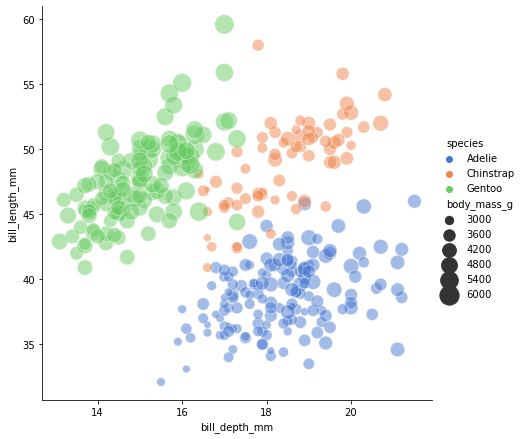

In [6]:
#Exploratory Data Analysis (EDA):

sns.relplot(x="bill_depth_mm", y="bill_length_mm", hue="species", size="body_mass_g",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=penguins)

[Text(0, 0.5, '')]

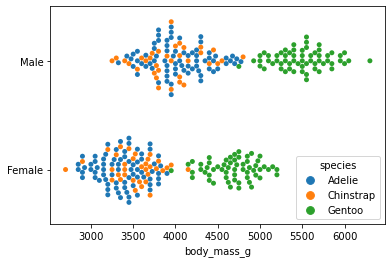

In [7]:
# Scatterplot with categorical variables
ax = sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")

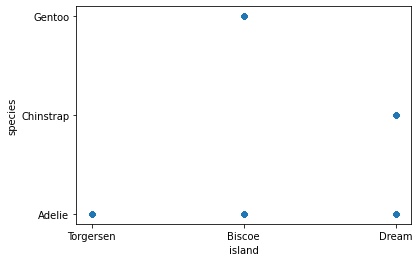

In [12]:
penguins.plot.scatter(x = 'island', y = 'species')
plt.show()

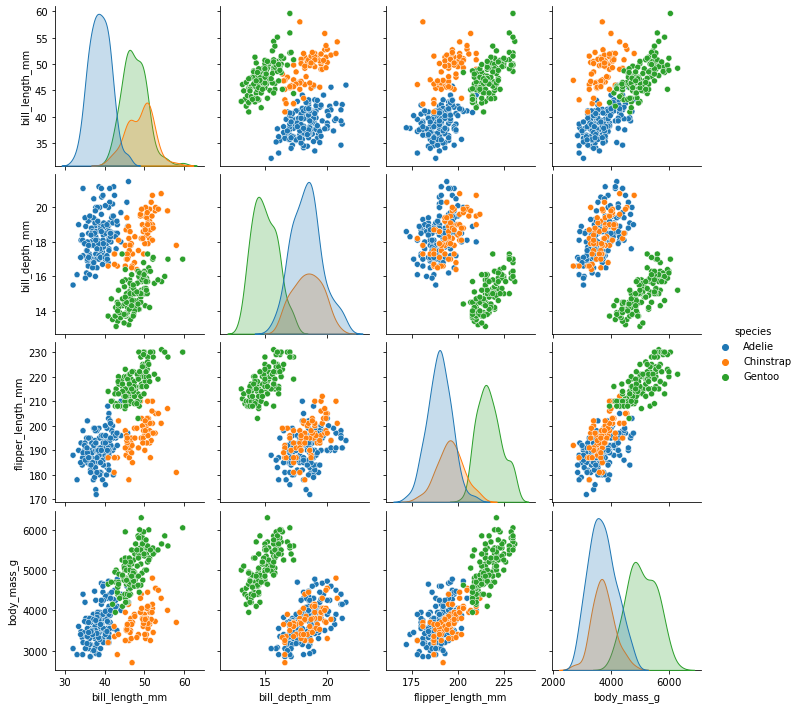

In [8]:
# Scatterplot Matrix 
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

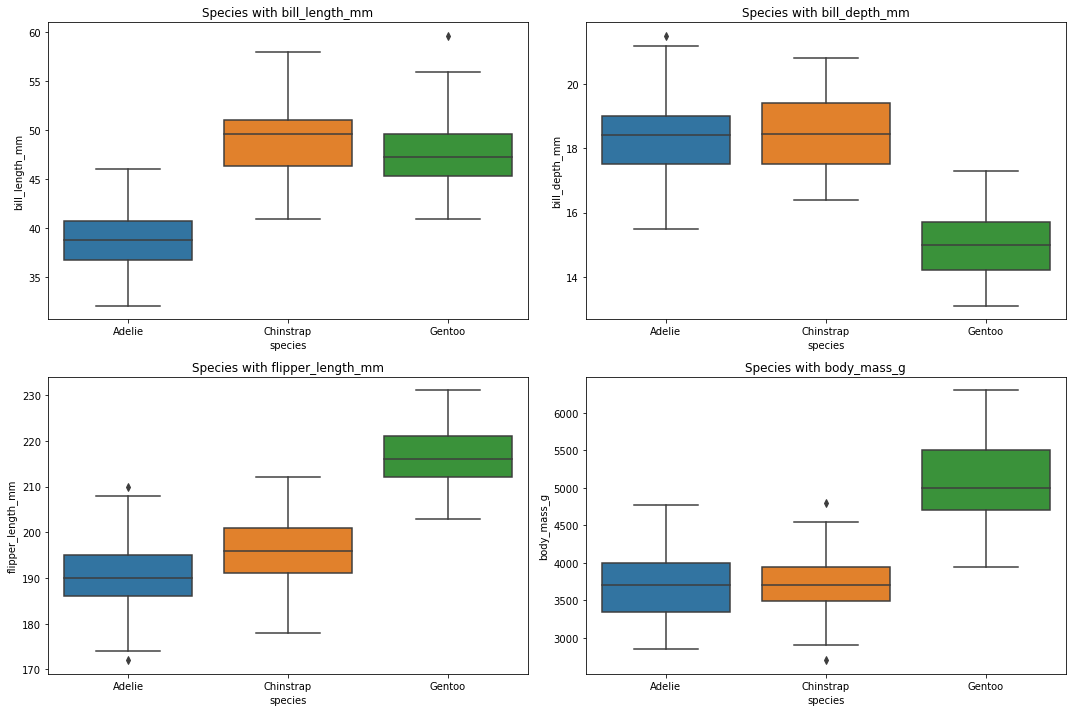

In [14]:
# Outlier calculation
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data=penguins, x='species', y='bill_length_mm', ax=ax[0,0]).set_title('Species with bill_length_mm')
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', ax=ax[0,1]).set_title('Species with bill_depth_mm')
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', ax=ax[1,0]).set_title('Species with flipper_length_mm')
sns.boxplot(data=penguins, x='species', y='body_mass_g', ax=ax[1,1]).set_title('Species with body_mass_g')
plt.tight_layout()

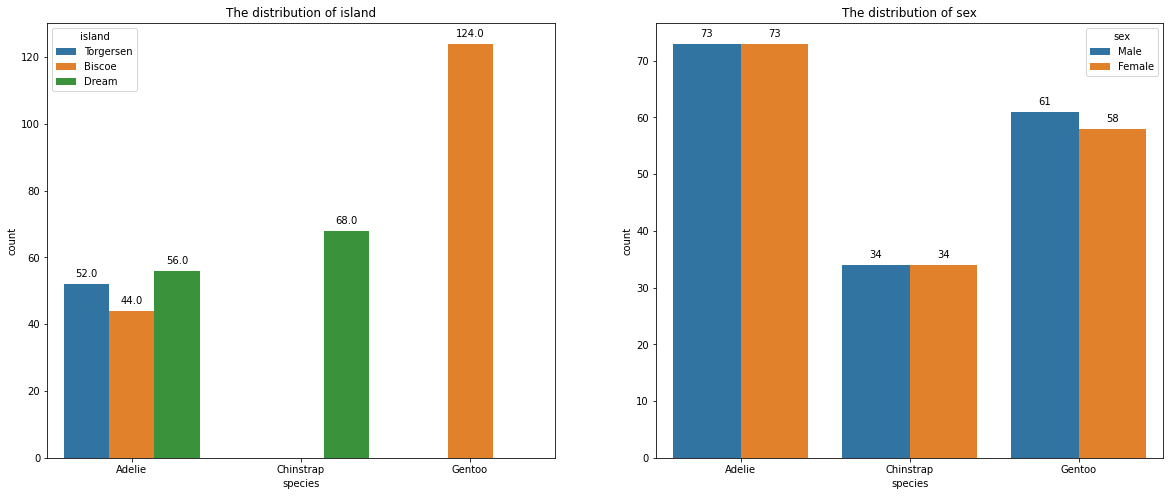

In [9]:

# Function to create an annotation on the plot
def show_annot(plot):
   for p in plot.patches:
       plot.annotate(
          format(p.get_height()),
          (p.get_x() + p.get_width() / 2., p.get_height()),
          ha='center',
          va='center',
          xytext=(0,10),
          textcoords='offset points'
       )

# distribution of categorical columns (island and sex)
      
fig, ax = plt.subplots(1,2, figsize=(20,8))
island_plot = sns.countplot(x='species', hue='island', data=penguins, ax=ax[0])
sex_plot = sns.countplot(x='species', hue='sex', data=penguins, ax=ax[1])
show_annot(island_plot)
show_annot(sex_plot)
ax[0].title.set_text("The distribution of island")
ax[1].title.set_text("The distribution of sex")

In [ ]:
%pip install seaborn==0.11.0

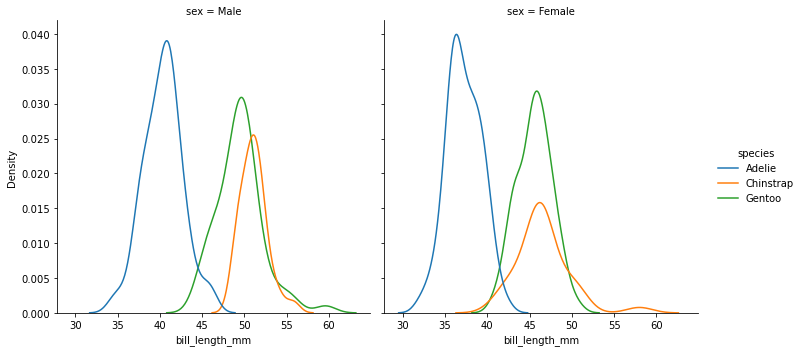

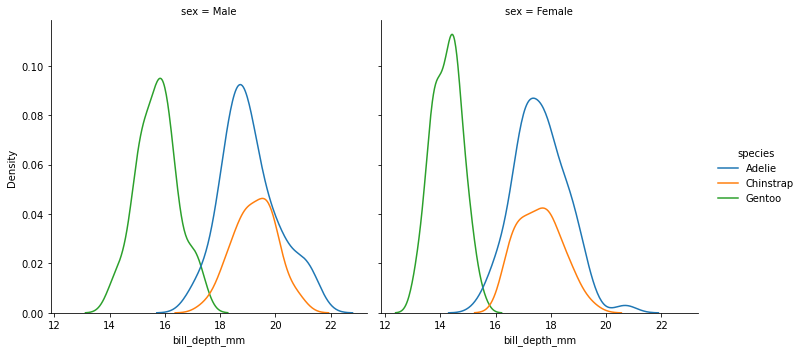

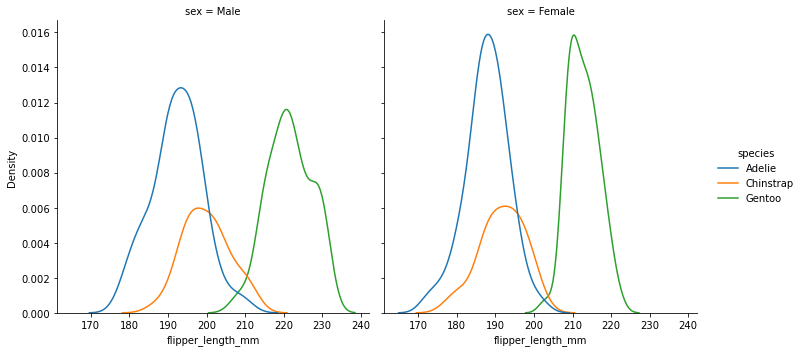

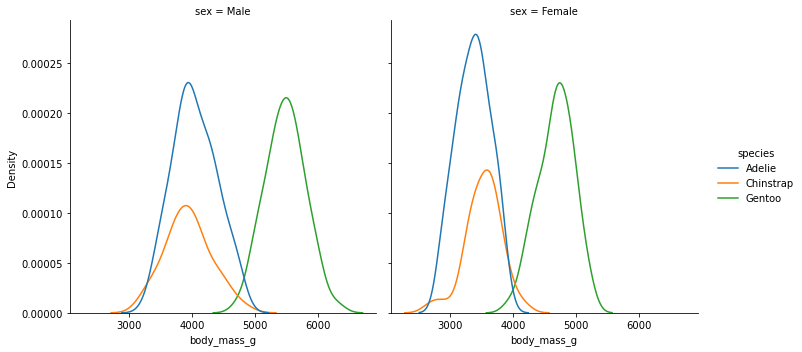

In [4]:
# Plot distribution from each numerical column: 

numerical_col = [col for col in penguins.columns if penguins[col].dtypes == np.float64]
categorical_col = [col for col in penguins.columns if penguins[col].dtypes == object]
sns.displot(data=penguins, x=numerical_col[0], kind='kde', hue='species', col='sex')
sns.displot(data=penguins, x=numerical_col[1], kind='kde', hue='species', col='sex')
sns.displot(data=penguins, x=numerical_col[2], kind='kde', hue='species', col='sex')
sns.displot(data=penguins, x=numerical_col[3], kind='kde', hue='species', col='sex')


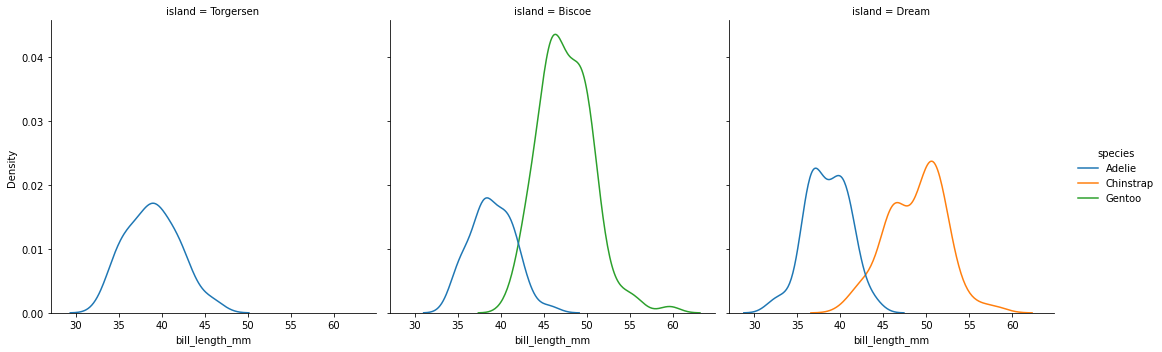

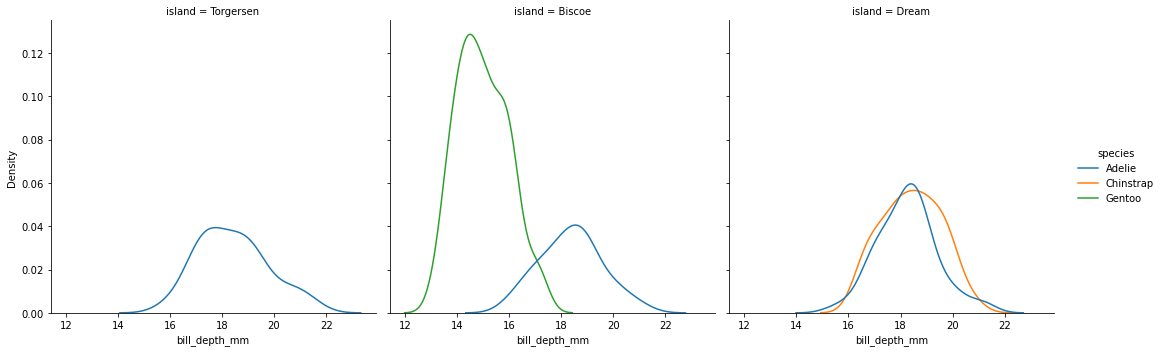

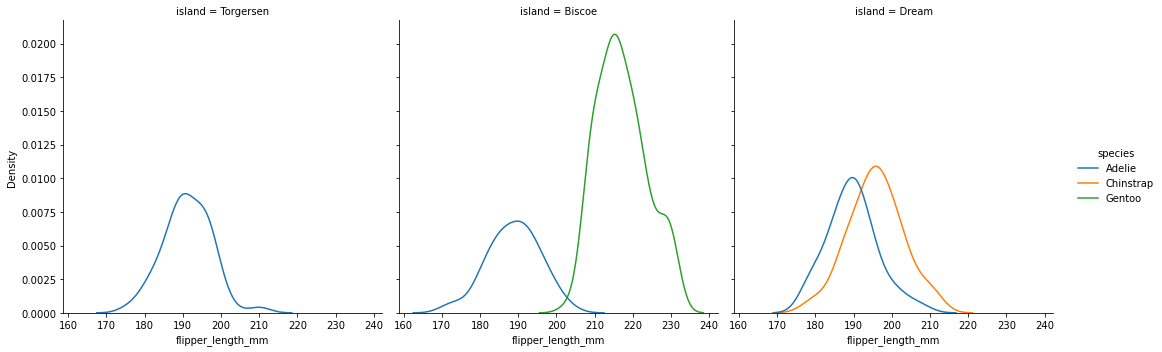

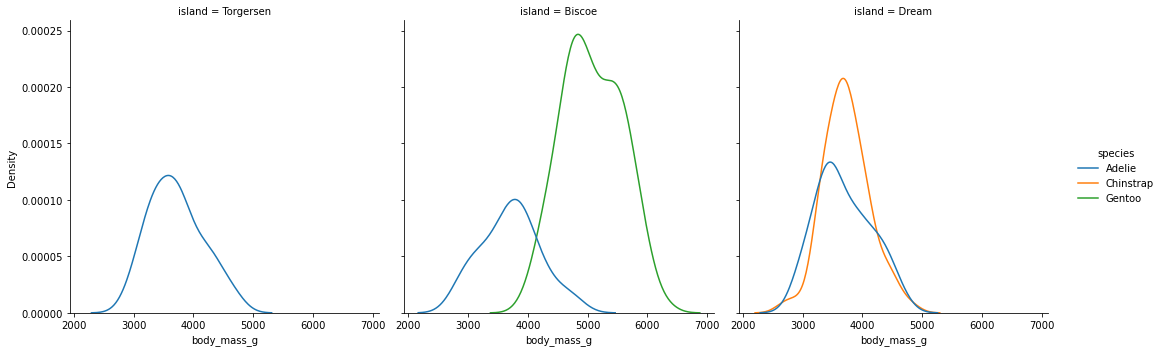

In [30]:
# Plot distribution from island column

numerical_col = [col for col in penguins.columns if penguins[col].dtypes == np.float64]
categorical_col = [col for col in penguins.columns if penguins[col].dtypes == object]
sns.displot(data=penguins, x=numerical_col[0], kind='kde', hue='species', col='island')
sns.displot(data=penguins, x=numerical_col[1], kind='kde', hue='species', col='island')
sns.displot(data=penguins, x=numerical_col[2], kind='kde', hue='species', col='island')
sns.displot(data=penguins, x=numerical_col[3], kind='kde', hue='species', col='island')

In [29]:
#Create independent variables (x) and dependent/target variable   (y)

x = penguins.drop(['species'], axis=1)
y = penguins['species']


In [11]:
# A glance at the independent variable
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...
339,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [12]:
#Have a glance at the independent variable
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [19]:
#Split the data into train and test sets:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [18]:
#Have a glance at the shape of the train and test sets:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
 

(275, 6)
(69, 6)
(275,)
(69,)


In [22]:
#column transformer
# Numerical Transformer with the steps of imputer then normalization using MinMaxScaler.

numerical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer()),
   ('normalization', MinMaxScaler())
])

# Categorical transformer imputing the missing data, with encode the categorical variable using OrdinalEncoder.

categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('ordinal', OrdinalEncoder())
])


In [23]:
#Data Preprocessing

categorical_with_missing = [col for col in penguins.columns if penguins[col].isna().any() and penguins[col].dtypes == object]
numerical_with_missing = [col for col in penguins.columns if penguins[col].isna().any() and penguins[col].dtypes == np.float64]
preprocessor = ColumnTransformer(
   transformers=[
      ('num', numerical_transformer, numerical_with_missing),
      ('cat', categorical_transformer, categorical_with_missing)
   ]
)


In [24]:
#Model selection

#KNN
knn = KNeighborsClassifier(n_neighbors=5)

#Train model 

Model1_pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('knn', knn)
])
Model1_pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('normalization',
                                                                   MinMaxScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                        

In [26]:
# Prediction from the test data and score from the test data

Predicted = Model1_pipeline.predict(x_test)
accuracy = Model1_pipeline.score(x_test, y_test)
print('The accuracy for KNN model is:', str(accuracy * 100) + '%')



The accuracy for KNN model is: 98.55072463768117%


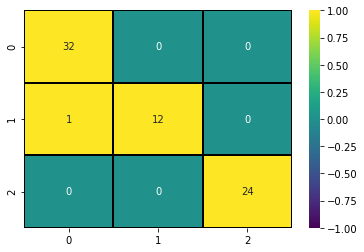

In [27]:
#confusion matrix from the predicted data

cm = confusion_matrix(y_test, Predicted)
sns.heatmap(cm, vmin=-1, vmax=1, annot=True, cmap='viridis', linewidth=1, linecolor='black')
